## Automatic detection of email phishing attacks - Email phishing classification

## Importing librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading data

In [2]:
data1 = pd.read_excel("phishing_email_.xlsx")

In [3]:
data2 = pd.read_excel("phishing_mails.xlsx")

In [4]:
df = pd.concat([data1, data2])

In [5]:
df

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0
...,...,...
1920,Want explicit SEX in 30 secs? Ring 02073162414...,1
1921,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
1922,Had your contract mobile 11 Mnths? Latest Moto...,1
1923,REMINDER FROM O2: To get 2.50 pounds free call...,1


# Data exploration

In [6]:
df.shape

(13854, 2)

Our dataset contains 2 features and 13854 observations. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13854 entries, 0 to 1924
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    13838 non-null  object
 1   Class   13854 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 324.7+ KB


#### Checking for duplicated rows

In [8]:
df.duplicated().sum()

2240

There are 2240 duplicated rows in this dataset. 

#### Checking for missing values

In [9]:
df.isna().sum()

Text     16
Class     0
dtype: int64

There are 16 missing email bodies in this dataset.

## WordCloud

In [10]:
df_phishing = df[df['Class'] == 1]
df_legitimate= df[df['Class'] == 0]

In [11]:
stop_words = set(stopwords.words('english'))

### Legitimate emails

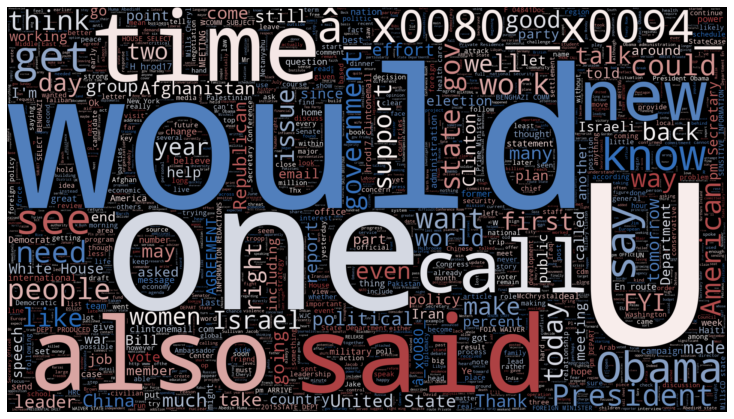

In [12]:
text = ' '.join(map(str, df_legitimate['Text'].tolist()))
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1920 , height = 1080 ,colormap='vlag', stopwords = stop_words).generate(text)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Phishing emails

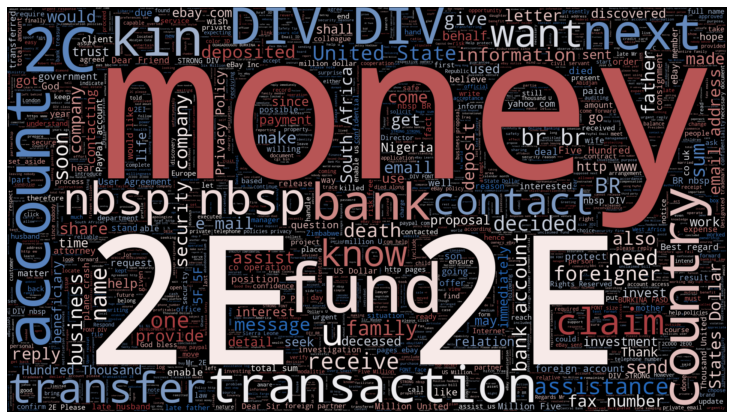

In [13]:
text = ' '.join(map(str, df_phishing['Text'].tolist()))
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1920 , height = 1080 ,colormap='vlag', stopwords = stop_words).generate(text)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Data preparation

## Data cleaning

### Removing duplicates

In [14]:
df.duplicated().sum()

2240

Our dataset contains 2240 duplicated rows that need to be deleted.

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

### Dealing with missing values

In [17]:
df.isna().sum()

Text     2
Class    0
dtype: int64

There are two rows with missing email bodies that need to be deleted.

In [18]:
df = df.dropna()

In [19]:
df.isna().sum()

Text     0
Class    0
dtype: int64

### Removing non valid emails

Filtering the dataset to keep only email bodies that fall within a reasonable length range.

In [20]:
df = df[df['Text'].str.len() > 1]  

Deleting the rows where the email body only contains the 'for your information' acronym (FYI).

In [21]:
df = df[~df['Text'].str.contains(r'^(FYI|fyi|Fyi|fYI|FYi)$')]

C:\Users\MSI\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Deleting the rows that contain an error message. 

In [22]:
df = df[~df['Text'].str.contains(r'#ERROR!')]

In [23]:
df.shape

(11562, 2)

## Removing non-English emails

In [24]:
#!pip install langdetect

In [25]:
from langdetect import detect

def is_english(text):
    try:
        lang = detect(text)
        if lang == 'en':
            return True
        else:
            return False
    except:
        return False


In [26]:
# Apply the is_english function to the Email Body column
df["Is English"] = df["Text"].apply(is_english)

# Filter the dataset to only include English emails
df = df[df["Is English"] == True]
# Drop the language column
df = df.drop(columns=["Is English"])


In [27]:
df

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0
...,...,...
1920,Want explicit SEX in 30 secs? Ring 02073162414...,1
1921,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
1922,Had your contract mobile 11 Mnths? Latest Moto...,1
1923,REMINDER FROM O2: To get 2.50 pounds free call...,1


### Checking the balance of the dataset

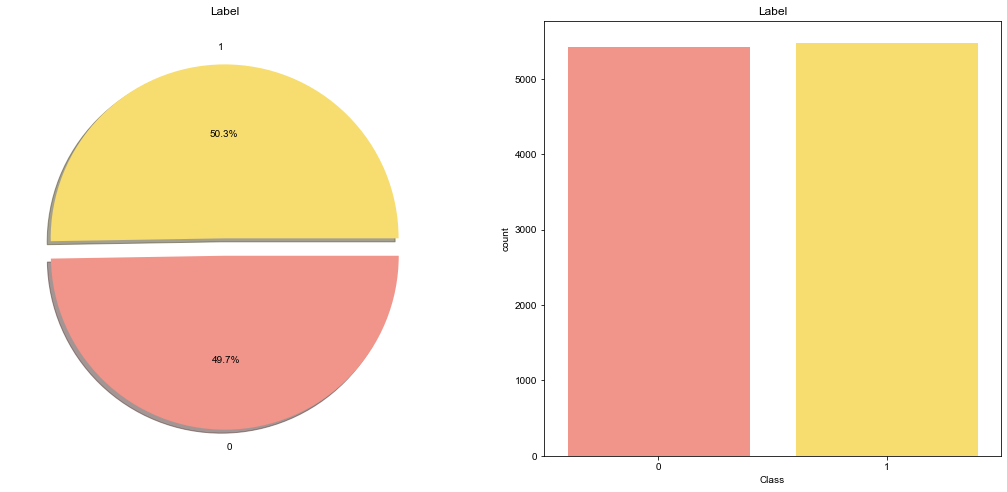

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=['#f7dc6f', '#f1948a'], )
sns.set_style("ticks")
ax[0].set_title('Label')
ax[0].set_ylabel('')
colors=['#f1948a','#f7dc6f']
sns.countplot(x = df["Class"], data = df, ax=ax[1],  palette=colors, saturation=1.5)
ax[1].set_title('Label')
plt.show()

As we can see from the output above, our dataset is pretty much balanced.

# Text preprocessing

### Removing any email headers and signatures that are not relevant to the analysis

In [29]:
# Regular expression pattern to match email headers
header_pattern = r'^.*?<[^\s<>]+@[^\s<>]+\>\S*\s*(Re:|Fw:|RE:|FW:)?\s'
re_fw_pattern = r'.*?(RE:|Re:|re:|FW:|Fw:|fw:|Fwd:)(\s*|$)'
month_pattern = r'^(January|February|March|April|May|June|July|August|September|October|November|December)'
am_pm_pattern=r'.*?(AM|PM)(?!\s*:)'
other_pattern=r'.*?(RE|Re|re|FW|Fw|fw|Fwd)(?!\s*:)'

# Remove different email headers from the email bodies 
df['Text'] = df['Text'].apply(lambda x: re.sub(header_pattern, '', x))
for index, row in df.iterrows():
    if re.match(month_pattern, row['Text']):
        df.at[index, 'Text'] = re.sub(re_fw_pattern, '', row['Text'])
for index, row in df.iterrows():
    if re.match(month_pattern, row['Text']):
        df.at[index, 'Text'] = re.sub(am_pm_pattern, '', row['Text'])

df.head()

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


In [30]:
# Regular expression pattern to match email signatures
signature_pattern = r"\n.*Regards,.*|\n.*Thanks.*|\n.*Sincerely,.*"

# Remove email signatures from the email bodies
df['Text'] = df['Text'].apply(lambda x: re.sub(signature_pattern, '', x))


### Removing HTML and nbsp encoding 

In [31]:
# Remove HTML or other markup language
html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
df['Text'] = df['Text'].apply(lambda x: re.sub(html,'', x))

In [32]:
# Remove nbsp encoding
df['Text'] = df['Text'].apply(lambda x: re.sub(r'(&nbsp|&#160|&n=bsp);*','', x))

### Removing numbers

Numbers that are not attached to any other character may not contribute much to the classification of the email as phishing or legitimate.

In [33]:
df['Text'] = df['Text'].apply(lambda x: re.sub(r'(?<!\S)\d+(?!\S)','', x))

In [34]:
df.to_excel('output_email.xlsx', index=False)

C:\Users\MSI\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:941: UserWarning: Ignoring URL 'http://maxblumenthal.com/2010/11/the-return-of-ghosts-debating-the-rise-of-geert-wilders-and-the-far-right/The%20Return%20of%20Ghosts:%20Debating%20the%20rise%20of%20Geert%20Wilders%20andthe%20far-right%20at%20the%20Nexus%20SymposiumOn%2011.18.10%20By%20MaxThe%20Nexus%20Institute's%20Return%20of%20Ghosts%20conference%20was%20inspired%20by%20the%20rise%20of%20far-right%20politician%20Geert%20Wilders%20in%20theNetherlandsI%20spent%20last%20week%20in%20Amsterdam%20where%20I%20participated%20in%20the%20%22Return%20of%20Ghosts%22%20symposium%20of%20the%20Nexus%20Institute%20adiscussion/debate%20about%20the%20resurgence%20of%20neo-fascism%20in%20Europe%20and%20anti-democratic%20trends%20in%20the%20West.%20Besidesproviding%20a%20forum%20for%20debating%20European%20politics%20the%20symposium%20was%20the%20occasion%20for%20the%20first%20public%20appearance%20inEurope%20by%20Peruvian%20writer%20Mario

### Removing the urls from the email bodies

In [35]:
# Initialize new dataframe to store URLs
url_df = pd.DataFrame(columns=['url', 'Class'])
# Regular expression to match URLs
url_pattern = r'(?:^|\s)https?://\S'

# Loop through rows in original dataframe and extract URLs
for index, row in df.iterrows():
    # Check if body column contains a URL
    if re.search(url_pattern, row['Text']):
        # Extract URL from body column using regular expression
        url = re.findall(url_pattern, row['Text'])[0]
        # Replace URL in body column with 'URL'
        df.at[index, 'Text'] = re.sub(url_pattern, 'URL', row['Text'])
        # Add URL and label to new dataframe
        url_df = url_df.append({'Class': row['Class'], 'url': url}, ignore_index=True)

# Print original and new dataframes
url_df


,url,Class
0,http://w,1
1,http://w,1
2,http://y,1
3,http://t,1
4,http://w,1
...,...,...
1031,http://w,1
1032,http://w,1
1033,http://w,1
1034,http://w,1


### Lower casing: Converting words to lower case

In [36]:
# lowercase the url column
df['Text'] = df['Text'].str.lower()
# print the resulting DataFrame
df

,Text,Class
0,supply quality china's exclusive dimensions at...,1
1,over. sidlet me know. thx.,0
2,dear valued paypal® member: paypal® is committ...,1
3,paypal you're billing information! dear paypal...,1
4,we recently noticed one or more attempts to lo...,0
...,...,...
1920,(1)your full names(2)contact address (3)phone/...,1
1921,asked 3mobile if chatlines inclu in free mins...,1
1922,had your contract mobile mnths? latest motoro...,1
1923,morales,1


In [37]:
df.to_excel('output_email.xlsx', index=False)

### Tokenization: Splitting the email bodies into tokens

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
from nltk.tokenize import word_tokenize
import re

# define a function to tokenize the email body
def tokenize_body(body):
    # split by forward slashes or other delimiters
    tokens = re.split(r'[\ \.\?\!]+', body)
    # remove any empty tokens
    tokens = [t for t in tokens if t]
    # tokenize each token using word_tokenize()
    words = []
    for token in tokens:
        words += word_tokenize(token)
    return words

# apply the tokenize_body function to the body column and create a new column for tokenized text
df['Preprocessed_Text'] = df['Text'].apply(tokenize_body)

# print the resulting DataFrame
df


,Text,Class,Preprocessed_Text
0,supply quality china's exclusive dimensions at...,1,"[supply, quality, china, 's, exclusive, dimens..."
1,over. sidlet me know. thx.,0,"[over, sidlet, me, know, thx]"
2,dear valued paypal® member: paypal® is committ...,1,"[dear, valued, paypal®, member, :, paypal®, is..."
3,paypal you're billing information! dear paypal...,1,"[paypal, you, 're, billing, information, dear,..."
4,we recently noticed one or more attempts to lo...,0,"[we, recently, noticed, one, or, more, attempt..."
...,...,...,...
1920,(1)your full names(2)contact address (3)phone/...,1,"[(, 1, ), your, full, names, (, 2, ), contact,..."
1921,asked 3mobile if chatlines inclu in free mins...,1,"[asked, 3mobile, if, chatlines, inclu, in, fre..."
1922,had your contract mobile mnths? latest motoro...,1,"[had, your, contract, mobile, mnths, latest, m..."
1923,morales,1,[morales]


### Stopwords removal

In [40]:
from nltk.corpus import stopwords
# remove stopwords from the url_tokens column
stop_words = set(stopwords.words('english'))
df['Preprocessed_Text'] = df['Preprocessed_Text'].apply(lambda x: [item for item in x if item not in stop_words])
df

,Text,Class,Preprocessed_Text
0,supply quality china's exclusive dimensions at...,1,"[supply, quality, china, 's, exclusive, dimens..."
1,over. sidlet me know. thx.,0,"[sidlet, know, thx]"
2,dear valued paypal® member: paypal® is committ...,1,"[dear, valued, paypal®, member, :, paypal®, co..."
3,paypal you're billing information! dear paypal...,1,"[paypal, 're, billing, information, dear, payp..."
4,we recently noticed one or more attempts to lo...,0,"[recently, noticed, one, attempts, log, accoun..."
...,...,...,...
1920,(1)your full names(2)contact address (3)phone/...,1,"[(, 1, ), full, names, (, 2, ), contact, addre..."
1921,asked 3mobile if chatlines inclu in free mins...,1,"[asked, 3mobile, chatlines, inclu, free, mins,..."
1922,had your contract mobile mnths? latest motoro...,1,"[contract, mobile, mnths, latest, motorola, ,,..."
1923,morales,1,[morales]


### Lemmatization : Reducing words to their base form

In [41]:
from nltk.stem import WordNetLemmatizer
# create an instance of the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# define a function to apply lemmatization to a list of tokens
def lemmatize_tokens(tokens):
    # apply lemmatization to each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# apply the lemmatize_tokens function to the preprocessed_url column
df['Preprocessed_Text'] = df['Preprocessed_Text'].apply(lemmatize_tokens)

# print the resulting DataFrame
df


,Text,Class,Preprocessed_Text
0,supply quality china's exclusive dimensions at...,1,"[supply, quality, china, 's, exclusive, dimens..."
1,over. sidlet me know. thx.,0,"[sidlet, know, thx]"
2,dear valued paypal® member: paypal® is committ...,1,"[dear, valued, paypal®, member, :, paypal®, co..."
3,paypal you're billing information! dear paypal...,1,"[paypal, 're, billing, information, dear, payp..."
4,we recently noticed one or more attempts to lo...,0,"[recently, noticed, one, attempt, log, account..."
...,...,...,...
1920,(1)your full names(2)contact address (3)phone/...,1,"[(, 1, ), full, name, (, 2, ), contact, addres..."
1921,asked 3mobile if chatlines inclu in free mins...,1,"[asked, 3mobile, chatlines, inclu, free, min, ..."
1922,had your contract mobile mnths? latest motoro...,1,"[contract, mobile, mnths, latest, motorola, ,,..."
1923,morales,1,[morale]


In [42]:
# Deleting the "Text" column
df = df.drop('Text', axis=1)

### Feature extraction using Bag of words 

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the vectorizer
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)

# Join the preprocessed words into strings
docs = [' '.join(words) for words in df['Preprocessed_Text']]

# Apply BoW to the preprocessed text column
bow_matrix = vectorizer.fit_transform(docs)

# create a DataFrame from the bag of words matrix
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names())

# add the phishing column to the DataFrame
bow_df['Class'] = df['Class'].values
# print the resulting DataFrame
bow_df

,00,000,000000,000008,00000e2511c8,00000eur,000066,00084740000484800938,000999,000m,...,â_x0080__x0094_30,â_x0080__x0094_and,â_x0080__x0094_but,â_x0080__x0094_no,â_x0080__x0094_that,â_x0080__x0094_the,â_x0082_,â_x0096_,ï2007,Class
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Modeling

### Splitting the dataset into training, validation, and testing sets

In [44]:
# Separating features and target
X = bow_df.drop('Class', axis=1)
y = df['Class']


In [45]:
from sklearn.model_selection import train_test_split
# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the test set into validation set and test set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Print the dimensions of the datasets
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 7648
Validation set size: 1639
Test set size: 1640


### Trying different models and comparing their performances

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instantiation and training of the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Prediction on the test data
y_pred_lr = lr.predict(X_val)

# Calculation of accuracy
accuracy = accuracy_score(y_val, y_pred_lr)
print('Accuracy:', accuracy)

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9420378279438683


## Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate and train the decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_dt = dt.predict(X_val)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_val, y_pred_dt)
print('Accuracy:', accuracy)


Accuracy: 0.9078706528370958


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Instantiate and train the random forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf.predict(X_val)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_val, y_pred_rf)
print('Accuracy:', accuracy)

Accuracy: 0.8767541183648566


# XGBoost

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Instantiate and train the XGBoost classifier
xgb_clf = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_xgb = xgb_clf.predict(X_val)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_val, y_pred_xgb)
print('Accuracy:', accuracy)

Accuracy: 0.9426479560707749


# Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate and train the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_nb = nb.predict(X_val)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_val, y_pred_nb)
print('Accuracy:', accuracy)


Accuracy: 0.8993288590604027


# KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_knn = knn.predict(X_val)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_val, y_pred_knn)
print('Accuracy:', accuracy)


Accuracy: 0.835875533862111


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### ROC curve

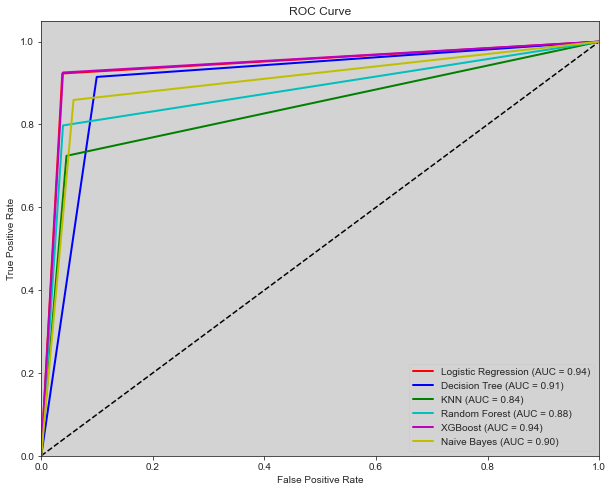

In [53]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.facecolor'] = 'lightgrey'

# Define your models and corresponding predicted probabilities here
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest', 'XGBoost', 'Naive Bayes']
y_preds = [y_pred_lr, y_pred_dt, y_pred_knn, y_pred_rf, y_pred_xgb, y_pred_nb]
colors = ['r', 'b', 'g', 'c', 'm', 'y']

plt.plot([0, 1], [0, 1], color='black', linestyle='--')

for i, model in enumerate(models):
    fpr, tpr, _ = roc_curve(y_val, y_preds[i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label='{} (AUC = {:.2f})'.format(model, auc_score))

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Applying Topic Modeling to improve Email Classification

####  Applying Topic Modeling

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Join the tokenized words into strings
docs = [' '.join(words) for words in df['Preprocessed_Text']]

# Create count vectorizer
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)

# Fit and transform data
dtm = vectorizer.fit_transform(docs)

# Create LDA model
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit LDA model on document term matrix
lda.fit(dtm)

# Print top words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])
    print("\n")

# Get topic assignments for each document
topic_assignments = lda.transform(dtm)

# Add topic assignments to dataset
bow_df['Topic'] = topic_assignments.argmax(axis=1)


Topic 0
['official', 'fund', 'project', 'ministry', '5f', 'government', 'payment', 'foreign', 'company', 'contract']


Topic 1
['question', 'member', 'privacy', 'sent', 'com', 'policy', 'item', 'email', 'message', 'ebay']


Topic 2
['business', 'transfer', 'bank', '2ei', '3a', 'money', '29', 'account', '2c', '2e']


Topic 3
['dear', 'banking', 'com', 'security', 'customer', 'service', 'client', 'information', 'bank', 'account']


Topic 4
['security', 'click', 'link', 'access', 'email', 'com', 'update', 'information', 'paypal', 'account']


Topic 5
['late', 'business', 'family', 'assistance', 'security', 'company', 'fund', 'father', 'country', 'money']


Topic 6
['say', 'year', 'â_x0080__x0094_', 'american', 'new', 'president', 'time', 'said', 'obama', 'state']


Topic 7
['death', 'child', 'year', 'life', 'fund', 'husband', 'know', 'god', 'want', 'money']


Topic 8
['business', 'claim', 'transfer', 'mr', 'transaction', 'kin', 'fund', 'money', 'account', 'bank']


Topic 9
['meeting', 'ar

#### Printing the resulting dataframe

In [57]:
bow_df

,00,000,000000,000008,00000e2511c8,00000eur,000066,00084740000484800938,000999,000m,...,â_x0080__x0094_and,â_x0080__x0094_but,â_x0080__x0094_no,â_x0080__x0094_that,â_x0080__x0094_the,â_x0082_,â_x0096_,ï2007,Class,Topic
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
10923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,7
10924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
10925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Logistic Regression after applying sentiment analysis and topic modeling

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Separating features and target
X = bow_df.drop('Class', axis=1)
y = df['Class']
# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the test set into validation set and test set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Instantiation and training of the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Prediction on the test data
y_pred_lr_2 = lr.predict(X_val)
y_pred_lr_2_train = lr.predict(X_train)

# Calculation of accuracy
val_accuracy = accuracy_score(y_val, y_pred_lr_2)
train_accuracy = accuracy_score(y_train, y_pred_lr_2_train)

print("Train Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy:  0.9747646443514645
Validation Accuracy:  0.9426479560707749


#### XGBoost after applying  topic modeling

In [59]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Instantiate and train the XGBoost classifier
xgb_clf = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_xgb_2 = xgb_clf.predict(X_val)
y_pred_xgb_2_train = xgb_clf.predict(X_train)

# Calculate the accuracy of the classifier
val_accuracy_xgb_2 = accuracy_score(y_val, y_pred_xgb_2)
train_accuracy_xgb_2_train = accuracy_score(y_train, y_pred_xgb_2_train)



print("Train Accuracy: ", train_accuracy_xgb_2_train)
print("Validation Accuracy: ", val_accuracy_xgb_2)

Train Accuracy:  0.9517520920502092
Validation Accuracy:  0.9450884685784015


#### Naive Bayes after applying  topic modeling

In [60]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate and train the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_nb_2 = nb.predict(X_val)
y_pred_nb_2_train = nb.predict(X_train)

# Calculate the accuracy of the classifier
val_accuracy_nb_2 = accuracy_score(y_val, y_pred_nb_2)
train_accuracy_nb_2 = accuracy_score(y_train, y_pred_nb_2_train)
print("Train Accuracy: ", train_accuracy_nb_2)
print("Validation Accuracy: ", val_accuracy_nb_2)

Train Accuracy:  0.9496600418410042
Validation Accuracy:  0.8993288590604027


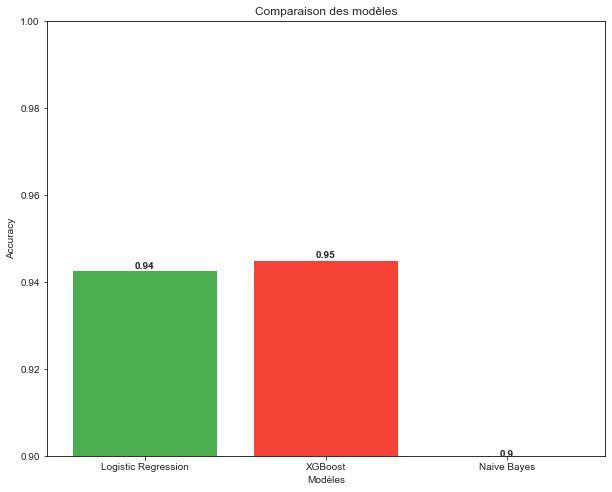

In [61]:
import matplotlib.pyplot as plt

# set background color to white and axis color to black
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'

# create data for the three models
model_names = ['Logistic Regression', 'XGBoost', 'Naive Bayes']
accuracies = [val_accuracy, val_accuracy_xgb_2, val_accuracy_nb_2]

# create a bar plot of the data
plt.bar(model_names, accuracies, color=['#4CAF50', '#F44336', '#2196F3'])

# add numerical values to the bars
for i, val in enumerate(accuracies):
    plt.text(i, val, round(val, 2), horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

# add axis labels and a title
plt.title("Comparaison des modèles")
plt.xlabel("Modèles")
plt.ylabel("Accuracy")

# set y-axis limits
plt.ylim(0.9, 1.0)

# show the plot
plt.show()


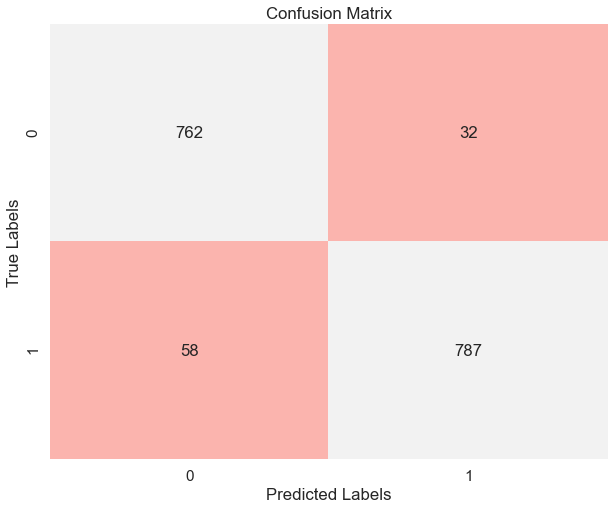

In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# y_test and y_pred are the true labels and predicted labels, respectively
confusion = confusion_matrix(y_val, y_pred_xgb_2)

sns.set(font_scale=1.4)
sns.heatmap(confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


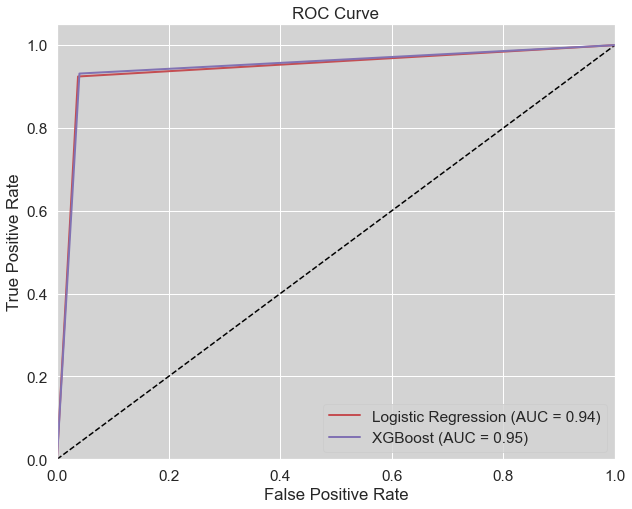

In [63]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.facecolor'] = 'lightgrey'

# Define your models and corresponding predicted probabilities here
models = ['Logistic Regression', 'XGBoost']
y_preds = [y_pred_lr_2, y_pred_xgb_2]
colors = ['r', 'm']

plt.plot([0, 1], [0, 1], color='black', linestyle='--')

for i, model in enumerate(models):
    fpr, tpr, _ = roc_curve(y_val, y_preds[i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label='{} (AUC = {:.2f})'.format(model, auc_score))

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Saving the model to disk

In [64]:
import joblib

# Save the trained model to disk
joblib.dump(xgb_clf, 'Email_phishing_detection/phishing_model.joblib')

['Email_phishing_detection/phishing_model.joblib']